In [1]:
# Importación de paquetes requeridos
import warnings
import os
import io
import requests
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
plt.close("all")
import scipy
import numpy as np

from IPython.display import display, Markdown, Latex
import matplotlib.colors as mcolors

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import dateparser
import json
import unidecode

In [64]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'lines.linewidth' : 3,
}
pylab.rcParams.update(params)

In [3]:
# Función auxiliar para visualizar los datos
def pp(obj):
    print(json.dumps(obj, indent=2))

In [4]:
# La operación queda con la forma siguiente:
# «para cada fila r, convertir el valor de la columna "col" en un tipo numérico (pd.to_numeric),
# ignorando los valores nulos (errors='coerce'), redondeando hacia abajo al entero más cercano
# (np.floor) y almacenándolo como entero de 64 bits (astype('Int64'))»

def pd_to_int(df:pd.DataFrame, col:str) -> int:
    return np.floor(pd.to_numeric(df[col], errors='coerce')).astype('Int64')

In [16]:
# Parmámetros
iga_api_base_url = 'http://ing-acc-movil01/ingenier@/symfony/public/index.php/api'
site_names = [
    "A16-S004","A16-S030","A16-S031","A16-S041",
    "A16-S048","A16-S049","A16-S052","A16-S053",
    "A16-S069","A16-S103","A16-S106","A16-S107",
    "A16-S108","A16-S156","A19-S004","A19-S042",
    "A19-S058","A19-S059","A19-S062","A19-S063",
    "A19-S118","A19-S119"
]

In [17]:
display(Markdown(f"# Ejemplo 004: Descarga del reporte de (Equality) KPI - agregación horaria, para visualización de distintas gráficas"))

# Ejemplo 004: Descarga del reporte de (Equality) KPI - agregación horaria, para visualización de distintas gráficas

In [18]:
# Llamamos a un endpoint de prueba en la API de IGA para verificar conectividad
display(Markdown("### IGA API test"))
x = requests.get(iga_api_base_url + '/public/db-sync-state')
pp(x.json())

### IGA API test

{
  "status": "success",
  "data": {
    "Uid": "41175",
    "State": "DB_SYNC_STATE_IDLE",
    "LastSyncTimestamp": "17-05-2022 19:32:10",
    "SyncState": "OK",
    "ProjectsUpdated": "DataManager, PBA"
  }
}


In [19]:
# Llamamos al endpoint equality-kpi-report para obtener el reporte
# "(Equality) KPI - agregación horaria":

# Parámetros en el payload de la request con que llamamos al endpoint de IGA:
payload = {
    # Sitios seleccionados
    "siteNames": site_names,
    # Parámetros de filtrado: ninguno
    "filteringParams": {},
    # Seleccionar por nombres de sitio: sí
    "selectBySiteNames": True,
    # Seleccionar por parámetros de filtrado: no
    "selectByFilteringParams": False,
    # Nombre de la tecnología
    "techName": "lte",
    # Fecha inicial
    "startDate": "2022-03-23",
    # Fecha final
    "endDate": "2022-03-23"
}
# Obtenemos los datos. Este proceso puede tardar algunos minutos.
x = requests.post(iga_api_base_url + '/public/report/equality-kpi-report', json=payload)

# En x almacenamos los datos devueltos por el endpoint de IGA.
# Es un archivo csv


In [9]:
# Usando pandas, con la función read_csv, leemos los datos y los almacenamos
# en memoria como un objeto de python:
with io.BytesIO(x.content) as fh:
    df_raw = pd.read_csv(fh, sep=';', decimal=',')

In [10]:
# Visualizamos los datos obtenidos:
display(Markdown(f"# (Equality) KPI - agregación horaria - Sitios: RSP Iguazu Ampliación BW"))
display(Markdown(f"### Tabla con orientación normal:"))
display(df_raw)

display(Markdown(f"### Tabla transpuesta:"))
# Los mismos datos pero transponiéndolos (intercambiando filas por columnas) para poder ver mejor todos los nombres de columnas:
display(df_raw.transpose())

# (Equality) KPI - agregación horaria - Sitios: RSP Iguazu Ampliación BW

### Tabla con orientación normal:

,celda,nombre,sitio,fecha,hora,acc_tot_pak,service_drop,int_csfb_rrc,llamadas,dl_traf_mb,...,usu_avg,usu_max,cell_dl_avg_thp_mbps,cell_ul_avg_thp_mbps,cell_availability,resource_block_utilizing_ul,resource_block_utilizing_dl,traf_VoLTE_erl,pak_loss_dl_qc1_VoLTE,pak_loss_ul_qc1_VoLTE
0,HRSCTLB11,Roque Saenz Peña Centro,A16-S004,2022-03-23,0,NaN,NaN,0.0,0.0,0.000000,...,0.000000,0.0,NaN,NaN,100.000000,0.000,0.000,0.000000,NaN,NaN
1,HRSCTLB12,Roque Saenz Peña Centro,A16-S004,2022-03-23,0,NaN,NaN,0.0,0.0,0.000000,...,0.000000,0.0,NaN,NaN,100.000000,0.000,0.000,0.000000,NaN,NaN
2,HRSCTLB13,Roque Saenz Peña Centro,A16-S004,2022-03-23,0,NaN,NaN,0.0,0.0,0.000000,...,0.000000,0.0,NaN,NaN,100.000000,0.000,0.000,0.000000,NaN,NaN
3,HRSCTLL11,Roque Saenz Peña Centro,A16-S004,2022-03-23,0,99.813124,0.104822,29.0,23185.0,5794.993349,...,70.345000,133.0,19.790245,0.960021,100.000000,23.375,61.125,0.154722,0.0,0.119693
4,HRSCTLL12,Roque Saenz Peña Centro,A16-S004,2022-03-23,0,99.989106,0.000000,13.0,9178.0,2300.723850,...,23.613611,54.0,20.533503,1.740412,100.000000,2.775,16.500,0.123333,0.0,0.007569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,IIALECL11,PUERTO IGUAZU CALLE ALECRIN,A19-S119,2022-03-23,23,99.557522,0.000000,0.0,267.0,33.844110,...,11.812500,20.0,11.830853,2.567617,NaN,1.500,4.400,0.000000,NaN,NaN
7479,IIALECL12,PUERTO IGUAZU CALLE ALECRIN,A19-S119,2022-03-23,23,100.000000,0.000000,0.0,226.0,42.971635,...,10.437500,17.0,12.617158,4.104386,NaN,1.300,9.300,0.000000,NaN,NaN
7480,IIALECM11,PUERTO IGUAZU CALLE ALECRIN,A19-S119,2022-03-23,23,100.000000,0.000000,0.0,19.0,25.798457,...,2.220833,4.0,11.917680,0.739946,7.166667,1.100,7.900,0.000000,NaN,NaN
7481,IIALECM12,PUERTO IGUAZU CALLE ALECRIN,A19-S119,2022-03-23,23,100.000000,0.000000,0.0,14.0,17.094687,...,4.604167,8.0,17.900466,2.109189,7.166667,0.500,2.200,0.000000,NaN,NaN


### Tabla transpuesta:

,0,1,2,3,4,5,6,7,8,9,...,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482
celda,HRSCTLB11,HRSCTLB12,HRSCTLB13,HRSCTLL11,HRSCTLL12,HRSCTLM11,HRSCTLM12,HRSCTLM13,HRSCTLM14,HRSCTLM16,...,IIPDMAN12,IIPDMAN13,IIALECB11,IIALECB12,IIALECB13,IIALECL11,IIALECL12,IIALECM11,IIALECM12,IIALECN11
nombre,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,Roque Saenz Peña Centro,...,PUERTO IGUAZU 1 DE MAYO,PUERTO IGUAZU 1 DE MAYO,PUERTO IGUAZU CALLE ALECRIN,PUERTO IGUAZU CALLE ALECRIN,PUERTO IGUAZU CALLE ALECRIN,PUERTO IGUAZU CALLE ALECRIN,PUERTO IGUAZU CALLE ALECRIN,PUERTO IGUAZU CALLE ALECRIN,PUERTO IGUAZU CALLE ALECRIN,PUERTO IGUAZU CALLE ALECRIN
sitio,A16-S004,A16-S004,A16-S004,A16-S004,A16-S004,A16-S004,A16-S004,A16-S004,A16-S004,A16-S004,...,A19-S118,A19-S118,A19-S119,A19-S119,A19-S119,A19-S119,A19-S119,A19-S119,A19-S119,A19-S119
fecha,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,...,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23,2022-03-23
hora,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
acc_tot_pak,NaN,NaN,NaN,99.813124,99.989106,100.0,99.888268,100.0,100.0,100.0,...,100.0,99.236641,NaN,NaN,NaN,99.557522,100.0,100.0,100.0,100.0
service_drop,NaN,NaN,NaN,0.104822,0.0,0.0,0.0,0.0,0.0,0.144928,...,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
int_csfb_rrc,0.0,0.0,0.0,29.0,13.0,2.0,4.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
llamadas,0.0,0.0,0.0,23185.0,9178.0,643.0,1255.0,353.0,530.0,387.0,...,69.0,130.0,0.0,0.0,0.0,267.0,226.0,19.0,14.0,19.0
dl_traf_mb,0.0,0.0,0.0,5794.993349,2300.72385,1698.558457,818.325682,559.733361,657.4017,2098.490544,...,13.04918,100.21412,0.0,0.0,0.0,33.84411,42.971635,25.798457,17.094687,49.104087


In [11]:
df = df_raw.copy()
df['datetime'] = df.apply(lambda r: datetime.strptime(r['fecha'] + ' ' + str(r['hora']), '%Y-%m-%d %H'), axis=1)
df['id_portadora'] = df.apply(lambda r: r['celda'][6], axis=1)
display(df[['datetime', 'celda', 'id_portadora']])

,datetime,celda,id_portadora
0,2022-03-23 00:00:00,HRSCTLB11,B
1,2022-03-23 00:00:00,HRSCTLB12,B
2,2022-03-23 00:00:00,HRSCTLB13,B
3,2022-03-23 00:00:00,HRSCTLL11,L
4,2022-03-23 00:00:00,HRSCTLL12,L
...,...,...,...
7478,2022-03-23 23:00:00,IIALECL11,L
7479,2022-03-23 23:00:00,IIALECL12,L
7480,2022-03-23 23:00:00,IIALECM11,M
7481,2022-03-23 23:00:00,IIALECM12,M


### resource_block_utilizing_dl

resource_block_utilizing_dl                          \
id_portadora                                  B       F       L       M   
datetime                                                                  
2022-03-23 00:00:00                         0.0  50.075  96.100  95.050   
2022-03-23 01:00:00                         0.0  39.250  89.600  94.625   
2022-03-23 02:00:00                         0.0  25.100  82.200  96.425   
2022-03-23 03:00:00                         0.0  22.450  87.300  96.050   
2022-03-23 04:00:00                         0.0  10.175  92.125  96.700   
2022-03-23 05:00:00                         0.0  14.025  93.875  96.875   
2022-03-23 06:00:00                         0.0  15.575  95.425  96.950   
2022-03-23 07:00:00                         0.0  25.750  94.750  96.975   
2022-03-23 08:00:00                         0.0  39.025  95.025  93.325   
2022-03-23 09:00:00                         0.0  49.075  93.550  96.275   
2022-03-23 10:00:00                         0.0  50.050  94.025  92.425   
2022-03-23 11:00:00                         0.0  57.000  93.775  92.700   
2022-03-23 12:00:00                         0.0  58.875  93.200  94.525   
2022-03-23 13:00:00                         0.0  67.550  95.250  92.850   
2022-03-23 14:00:00                         0.0  69.050  95.850  94.425   
2022-03-23 15:00:00                         0.0  65.100  96.225  94.975   
2022-03-23 16:00:00                         0.0  61.225  96.175  94.775   
2022-03-23 17:00:00                         0.0  61.950  95.725  93.950   
2022-03-23 18:00:00                         0.0  66.150  93.800  91.375   
2022-03-23 19:00:00                         0.0  66.850  94.200  91.950   
2022-03-23 20:00:00                         0.0  79.575  95.325  93.475   
2022-03-23 21:00:00                         0.0  70.400  95.475  93.800   
2022-03-23 22:00:00                         0.0  83.375  95.650  96.050   
2022-03-23 23:00:00                         0.0  86.275  95.525  96.900   

                                     
id_portadora              N       O  
datetime                             
2022-03-23 00:00:00  89.900  93.025  
2022-03-23 01:00:00  91.125  92.000  
2022-03-23 02:00:00  83.450  90.925  
2022-03-23 03:00:00  85.500  90.750  
2022-03-23 04:00:00  85.975  90.575  
2022-03-23 05:00:00  87.625  90.300  
2022-03-23 06:00:00  86.800  92.000  
2022-03-23 07:00:00  89.950  91.925  
2022-03-23 08:00:00  92.725  93.025  
2022-03-23 09:00:00  91.050  93.025  
2022-03-23 10:00:00  89.375  92.225  
2022-03-23 11:00:00  89.350  91.175  
2022-03-23 12:00:00  94.675  91.075  
2022-03-23 13:00:00  94.575  93.025  
2022-03-23 14:00:00  90.200  93.725  
2022-03-23 15:00:00  95.200  92.250  
2022-03-23 16:00:00  95.800  91.750  
2022-03-23 17:00:00  94.325  91.300  
2022-03-23 18:00:00  92.725  91.525  
2022-03-23 19:00:00  94.400  92.375  
2022-03-23 20:00:00  94.375  94.400  
2022-03-23 21:00:00  93.325  94.325  
2022-03-23 22:00:00  94.025  94.325  
2022-03-23 23:00:00  94.150  95.350

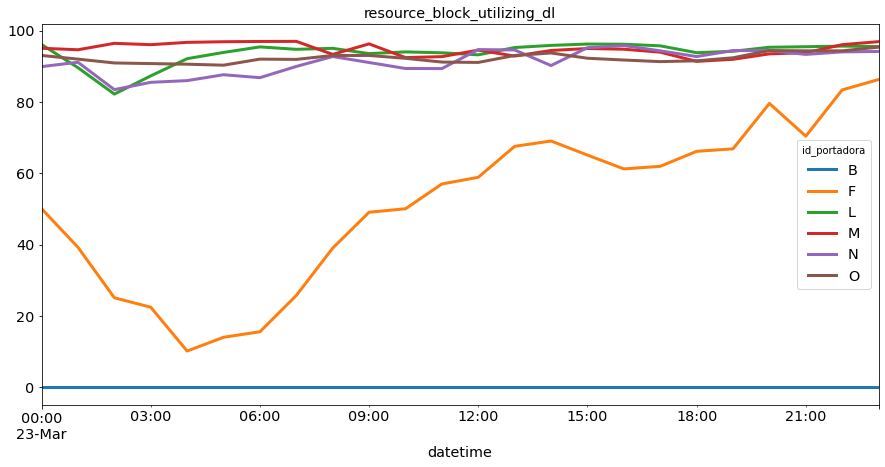

In [12]:
display(Markdown("### resource_block_utilizing_dl"))
df_prb_dl_avg = df.groupby(['datetime', 'id_portadora'], as_index=True)[[
    'resource_block_utilizing_dl'
]].agg({
    'resource_block_utilizing_dl': 'max',
}).unstack('id_portadora')
display(df_prb_dl_avg)

df_prb_dl_avg.plot.line(title='resource_block_utilizing_dl', y='resource_block_utilizing_dl', figsize=(15, 7))
plt.show()

### cell_ul_avg_thp_mbps

cell_ul_avg_thp_mbps                                 \
id_portadora                           B         F          L         M   
datetime                                                                  
2022-03-23 00:00:00                  NaN  2.107706   3.484391  3.172030   
2022-03-23 01:00:00                  NaN  1.489172   3.488674  5.215791   
2022-03-23 02:00:00                  NaN  3.753737  12.139099  5.422700   
2022-03-23 03:00:00                  NaN  3.508299  18.231041  7.945620   
2022-03-23 04:00:00                  NaN  2.546108   4.874471  4.472101   
2022-03-23 05:00:00                  NaN  3.381488   9.033560  6.353358   
2022-03-23 06:00:00                  NaN  1.398450   6.887425  4.529862   
2022-03-23 07:00:00                  NaN  2.643646   6.937900  3.811508   
2022-03-23 08:00:00                  NaN  1.987801   3.838283  3.031742   
2022-03-23 09:00:00                  NaN  2.188035   4.990220  4.163799   
2022-03-23 10:00:00                  NaN  2.284230   6.251786  6.580727   
2022-03-23 11:00:00                  NaN  2.866100   4.549213  4.021552   
2022-03-23 12:00:00                  NaN  2.393443   4.906677  9.578034   
2022-03-23 13:00:00                  NaN  2.310557   5.736003  3.142584   
2022-03-23 14:00:00                  NaN  2.773733   7.313102  3.261861   
2022-03-23 15:00:00                  NaN  3.093478   4.366159  3.324525   
2022-03-23 16:00:00                  NaN  3.296598   3.038633  2.658322   
2022-03-23 17:00:00                  NaN  2.398490   4.066476  2.967660   
2022-03-23 18:00:00                  NaN  3.641015   7.329350  4.864624   
2022-03-23 19:00:00                  NaN  4.984549   4.185571  4.045593   
2022-03-23 20:00:00                  NaN  3.653456   4.649403  3.833449   
2022-03-23 21:00:00                  NaN  2.590985   4.287601  4.214116   
2022-03-23 22:00:00                  NaN  3.049708   4.133006  2.902127   
2022-03-23 23:00:00                  NaN  2.889989   4.104386  7.412101   

                                          
id_portadora                 N         O  
datetime                                  
2022-03-23 00:00:00   2.688962  1.746954  
2022-03-23 01:00:00   4.262850  1.419266  
2022-03-23 02:00:00  14.646530  1.887321  
2022-03-23 03:00:00   6.485412  2.622859  
2022-03-23 04:00:00   3.274668  3.694840  
2022-03-23 05:00:00   5.088653  1.613627  
2022-03-23 06:00:00   8.785497  1.765840  
2022-03-23 07:00:00   3.226372  2.486492  
2022-03-23 08:00:00   2.154011  1.774868  
2022-03-23 09:00:00   2.509233  1.203836  
2022-03-23 10:00:00   2.908729  1.409077  
2022-03-23 11:00:00   2.562733  1.595595  
2022-03-23 12:00:00   2.779181  3.600275  
2022-03-23 13:00:00   3.858570  5.146744  
2022-03-23 14:00:00   4.005549  2.815383  
2022-03-23 15:00:00   2.648851  1.460951  
2022-03-23 16:00:00   2.577451  1.468987  
2022-03-23 17:00:00   3.096034  1.492188  
2022-03-23 18:00:00   4.166374  2.097148  
2022-03-23 19:00:00   4.027909  2.004423  
2022-03-23 20:00:00   4.093056  1.745080  
2022-03-23 21:00:00   3.648855  1.212971  
2022-03-23 22:00:00   3.466833  1.738607  
2022-03-23 23:00:00   3.095271  1.849166

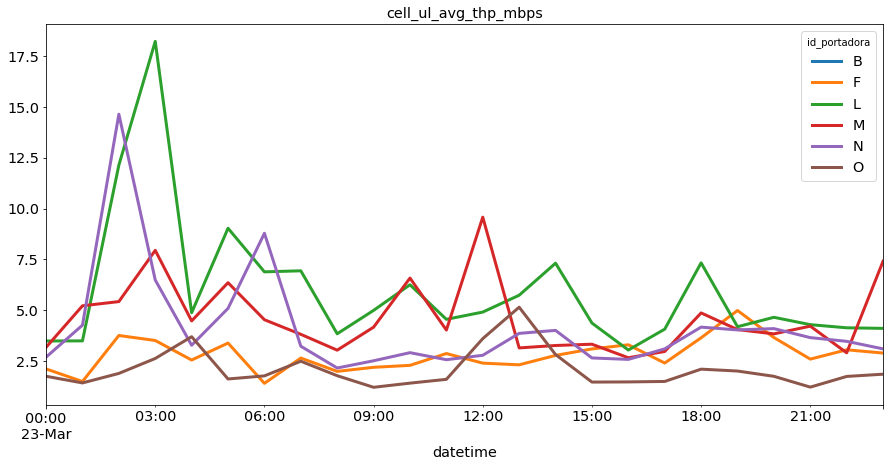

In [13]:
display(Markdown("### cell_ul_avg_thp_mbps"))
df_thp_usr_dl = df.groupby(['datetime', 'id_portadora'], as_index=True)[[
    'cell_ul_avg_thp_mbps'
]].agg({
    'cell_ul_avg_thp_mbps': 'max',
}).unstack('id_portadora')
display(df_thp_usr_dl)

df_thp_usr_dl.plot.line(title='cell_ul_avg_thp_mbps', y='cell_ul_avg_thp_mbps', figsize=(15, 7))
plt.show()

### usu_avg

usu_avg                                                  \
id_portadora              B           F           L           M           N   
datetime                                                                      
2022-04-23 00:00:00     0.0  106.551389  261.086944  283.473611  467.263333   
2022-04-23 01:00:00     0.0   91.715833  218.944444  170.039722  214.900556   
2022-04-23 02:00:00     0.0   84.155000  197.380278   84.523611  148.802778   
2022-04-23 03:00:00     0.0   74.686389  171.795000  108.994722  100.968056   
2022-04-23 04:00:00     0.0   69.105000  165.681667   94.436944  115.555833   
2022-04-23 05:00:00     0.0   70.896667  152.693889   92.669167  118.800833   
2022-04-23 06:00:00     0.0   70.832778  158.143056  112.920278  127.550833   
2022-04-23 07:00:00     0.0  109.960834  180.432500   74.380556  118.876944   
2022-04-23 08:00:00     0.0  144.299722  220.969722  101.512778  142.152778   
2022-04-23 09:00:00     0.0  172.538056  248.435000  120.298611  141.713611   
2022-04-23 10:00:00     0.0  140.992222  291.703889  129.333889  117.903333   
2022-04-23 11:00:00     0.0  203.959444  200.005833  138.937222  125.075278   
2022-04-23 12:00:00     0.0  200.790833  271.250833  154.768056  139.921389   
2022-04-23 13:00:00     0.0  175.367222  274.317222  167.282222  107.351111   
2022-04-23 14:00:00     0.0  163.128056  274.272500  170.027222  150.791111   
2022-04-23 15:00:00     0.0  167.852778  259.100000  169.488611  139.250833   
2022-04-23 16:00:00     0.0  130.568889  259.418889  157.958056  128.874722   
2022-04-23 17:00:00     0.0  192.849722  242.945833  148.338333  119.951111   
2022-04-23 18:00:00     0.0  204.716111  263.796389  157.610833  151.987778   
2022-04-23 19:00:00     0.0  210.613611  237.325556  168.271111  175.160833   
2022-04-23 20:00:00     0.0  196.801111  301.958333  185.806389  356.487500   
2022-04-23 21:00:00     0.0  171.998056  348.836944  185.930556  363.220278   
2022-04-23 22:00:00     0.0  150.969167  359.158333  196.564722  124.126111   
2022-04-23 23:00:00     0.0  135.566667  308.408333  168.743056  112.553333   

                                
id_portadora                 O  
datetime                        
2022-04-23 00:00:00  47.422778  
2022-04-23 01:00:00  37.771389  
2022-04-23 02:00:00  29.962778  
2022-04-23 03:00:00  53.112778  
2022-04-23 04:00:00  49.333333  
2022-04-23 05:00:00  46.278333  
2022-04-23 06:00:00  42.283333  
2022-04-23 07:00:00  39.225278  
2022-04-23 08:00:00  34.635000  
2022-04-23 09:00:00  40.095000  
2022-04-23 10:00:00  43.921111  
2022-04-23 11:00:00  51.945833  
2022-04-23 12:00:00  56.962222  
2022-04-23 13:00:00  63.737222  
2022-04-23 14:00:00  57.460278  
2022-04-23 15:00:00  58.245556  
2022-04-23 16:00:00  48.316667  
2022-04-23 17:00:00  50.356944  
2022-04-23 18:00:00  56.749444  
2022-04-23 19:00:00  56.886389  
2022-04-23 20:00:00  59.446944  
2022-04-23 21:00:00  54.744444  
2022-04-23 22:00:00  59.078889  
2022-04-23 23:00:00  49.513611

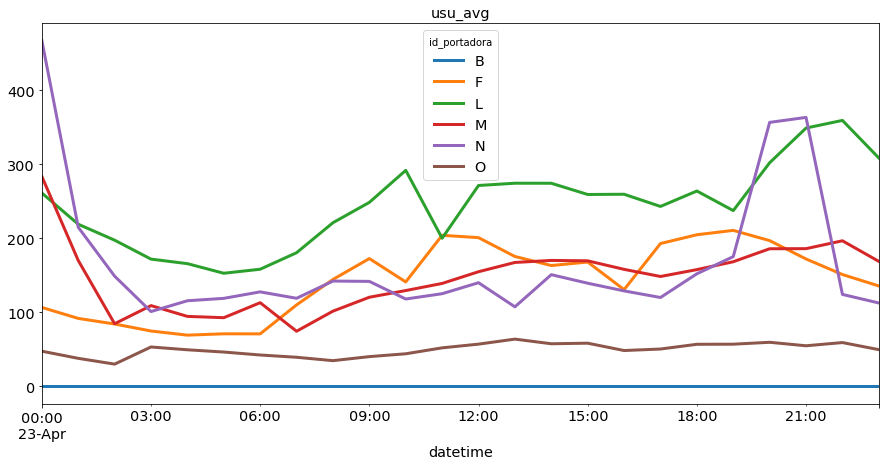

In [65]:
display(Markdown("### usu_avg"))
df_active_usr_dl_avg = df.groupby(['datetime', 'id_portadora'], as_index=True)[[
    'usu_avg'
]].agg({
    'usu_avg': 'max',
}).unstack('id_portadora')
display(df_active_usr_dl_avg)

df_active_usr_dl_avg.plot.line(title='usu_avg', y='usu_avg', figsize=(15, 7))
plt.show()

,resource_block_utilizing_dl,usu_avg,id_portadora
0,0.000,0.000000,B
1,0.000,0.000000,B
2,0.000,0.000000,B
3,61.125,70.345000,L
4,16.500,23.613611,L
...,...,...,...
7478,4.400,11.812500,L
7479,9.300,10.437500,L
7480,7.900,2.220833,M
7481,2.200,4.604167,M


['B' 'L' 'M' 'N' 'O' 'F']


### usu_avg vs prb_dl_avg - Id portadora: B

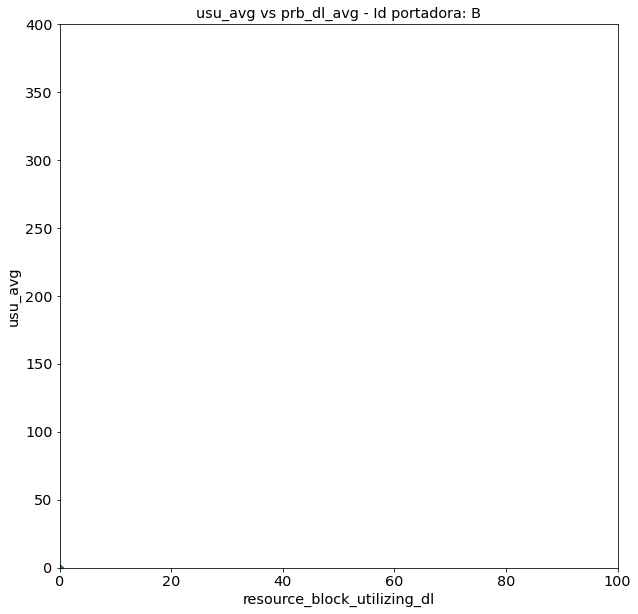

### usu_avg vs prb_dl_avg - Id portadora: L

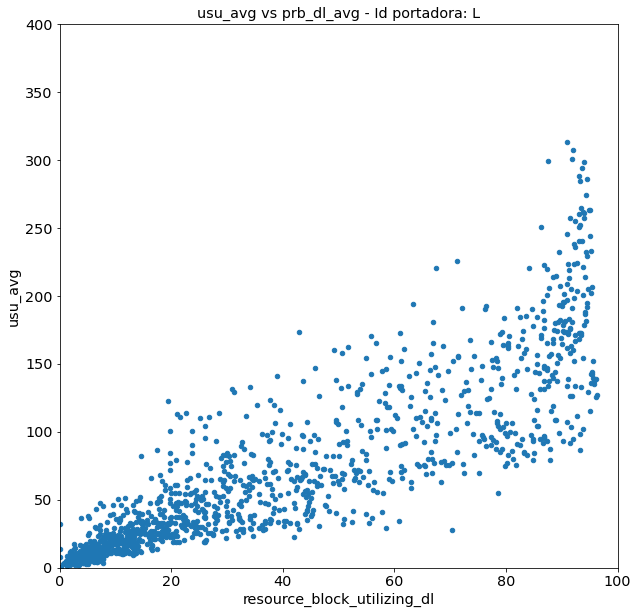

### usu_avg vs prb_dl_avg - Id portadora: M

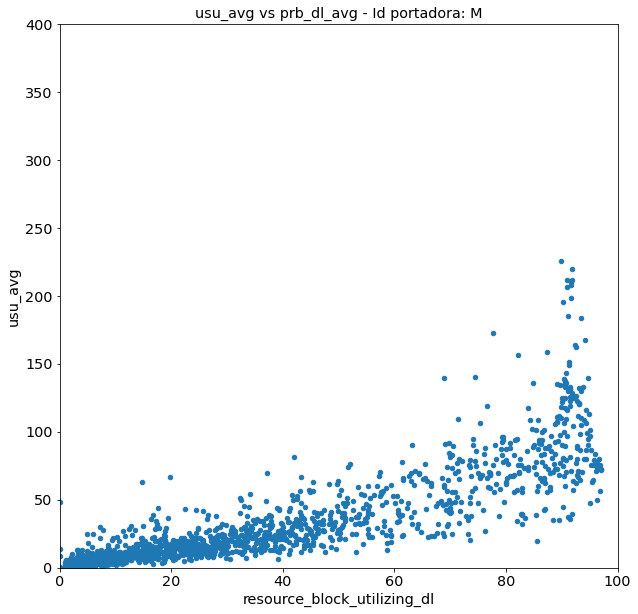

### usu_avg vs prb_dl_avg - Id portadora: N

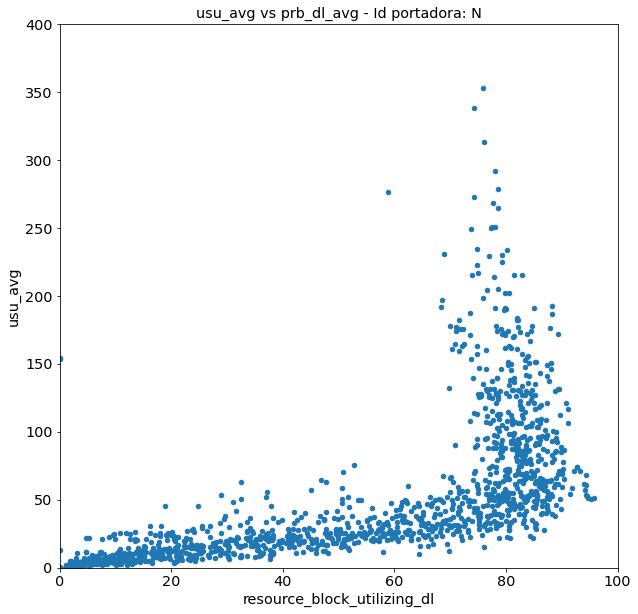

### usu_avg vs prb_dl_avg - Id portadora: O

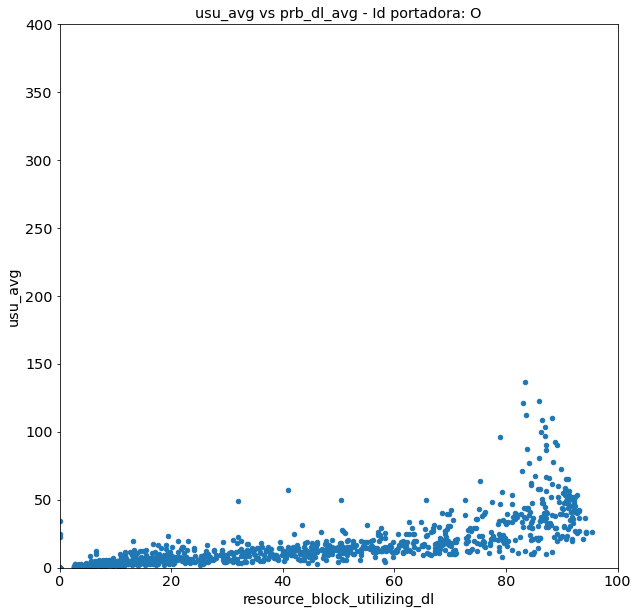

### usu_avg vs prb_dl_avg - Id portadora: F

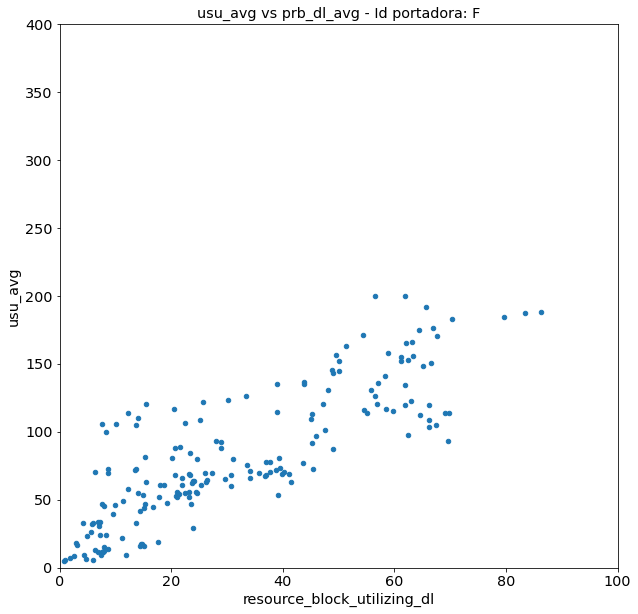

### usu_avg vs prb_dl_avg - Combinado

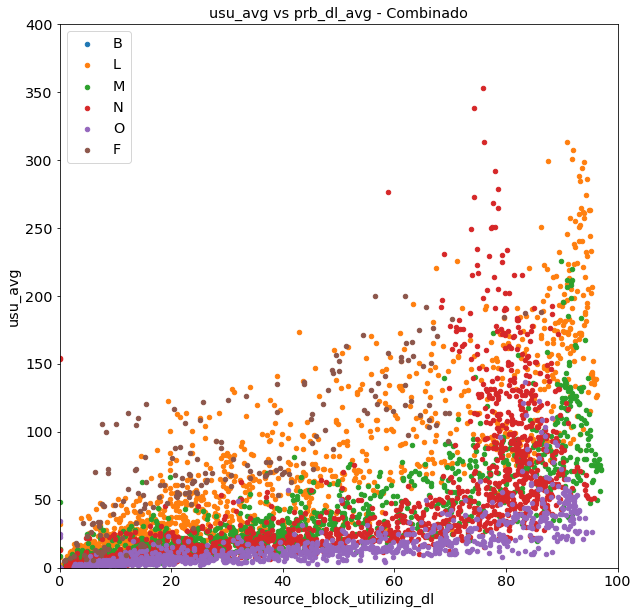

In [15]:
df_prb_dl_vs_active_user = df[[
    'resource_block_utilizing_dl',
    'usu_avg',
    'id_portadora'
]]

display(df_prb_dl_vs_active_user)

ids_portadora = df_prb_dl_vs_active_user['id_portadora'].unique()
print(ids_portadora)

for id_portadora in ids_portadora:
    titulo = f"usu_avg vs prb_dl_avg - Id portadora: {id_portadora}"
    display(Markdown("### " + titulo))
    df_id = df_prb_dl_vs_active_user.loc[df_prb_dl_vs_active_user['id_portadora'] == id_portadora]
    df_id.plot.scatter(title=titulo, x='resource_block_utilizing_dl', y='usu_avg', xlim=(0, 100), ylim=(0, 400), figsize=(10, 10))
    plt.show()

ax = plt.gca()

titulo = f"usu_avg vs prb_dl_avg - Combinado"
display(Markdown("### " + titulo))
colors = list(mcolors.TABLEAU_COLORS.values())

for i, id_portadora in enumerate(ids_portadora):
    color = colors[i]
    df_id = df_prb_dl_vs_active_user.loc[df_prb_dl_vs_active_user['id_portadora'] == id_portadora]
    df_id.plot.scatter(
        title=titulo,
        x='resource_block_utilizing_dl',
        y='usu_avg',
        label=id_portadora,
        xlim=(0, 100),
        ylim=(0, 400),
        figsize=(10, 10),
        color=color,
        ax=ax
    )

plt.show()
